# EPL Player Stats 24/25 Analysis


This project analyzes the 'English Premier League Player Stats 24/25' dataset from Kaggle:  
🔗 https://www.kaggle.com/datasets/aesika/english-premier-league-player-stats-2425

The dataset contains performance metrics of EPL players for the 2024/2025 season.  
This analysis helps uncover patterns in player performance, build predictive models, and explore relationships such as playtime and goal-scoring.

**Column Descriptions** (based on availability):
- `Name`: Player's name  
- `Team`: Club name  
- `Position`: Player's position  
- `Appearances`: Matches played  
- `Goals`: Goals scored  
- `Assists`: Assists made  
- `Minutes`: Total minutes played  
- `YellowCards`: Count of yellow cards  
- `RedCards`: Count of red cards  


In [21]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


# Load CSV
df = pd.read_csv("english_premier_league_stats.csv")

# Overview
print(df.head())
print(df.info())
print(df.describe())


     Player Name     Club Nationality Position  Appearances  Minutes  Goals  \
0      Ben White  Arsenal     England      DEF           17     1198      0   
1    Bukayo Saka  Arsenal     England      MID           25     1735      6   
2     David Raya  Arsenal       Spain      GKP           38     3420      0   
3    Declan Rice  Arsenal     England      MID           35     2833      4   
4  Ethan Nwaneri  Arsenal     England      MID           26      889      4   

   Assists  Shots  Shots On Target  ... Fouls  Yellow Cards  Red Cards  Saves  \
0        2      9               12  ...    10             2          0      0   
1       10     67                2  ...    15             3          0      0   
2        0      0                0  ...     1             3          0     86   
3        7     48               18  ...    21             5          1      0   
4        0     24                0  ...     9             1          0      0   

   Saves %  Penalties Saved  Clearance

## Data Cleaning

In [22]:

# Remove duplicates
print("Duplicates removed:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Handle missing values
print("Missing values:\n", df.isnull().sum())
for col in ['Goals', 'Assists', 'Minutes']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


Duplicates removed: 0
Missing values:
 Player Name                  0
Club                         0
Nationality                  0
Position                     0
Appearances                  0
Minutes                      0
Goals                        0
Assists                      0
Shots                        0
Shots On Target              0
Conversion %                 0
Big Chances Missed           0
Hit Woodwork                 0
Offsides                     0
Touches                      0
Passes                       0
Successful Passes            0
Passes%                      0
Crosses                      0
Successful Crosses           0
Crosses %                    0
fThird Passes                0
Successful fThird Passes     0
fThird Passes %              0
Through Balls                0
Carries                      0
Progressive Carries          0
Carries Ended with Goal      0
Carries Ended with Assist    0
Carries Ended with Shot      0
Carries Ended with Chance    0


## Exploratory Data Analysis (EDA)

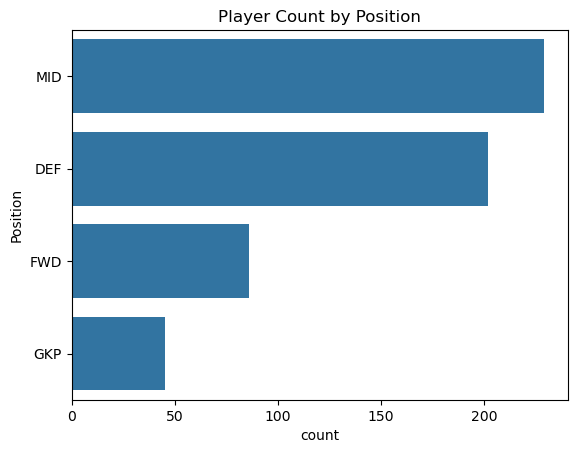

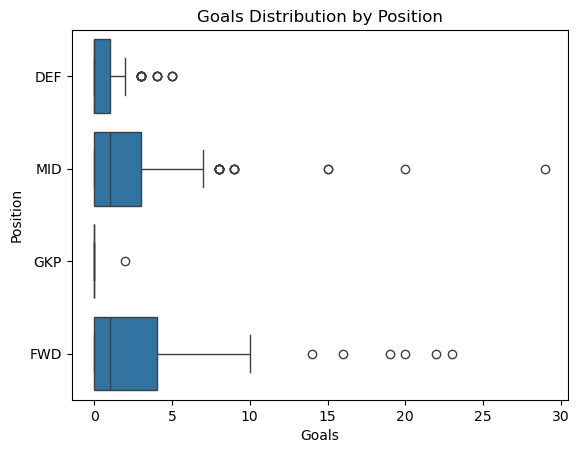

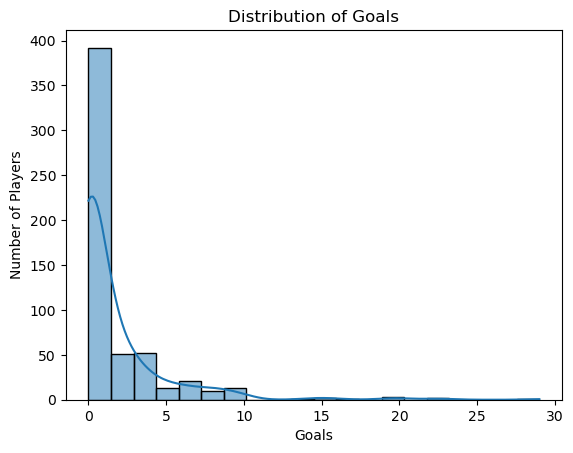

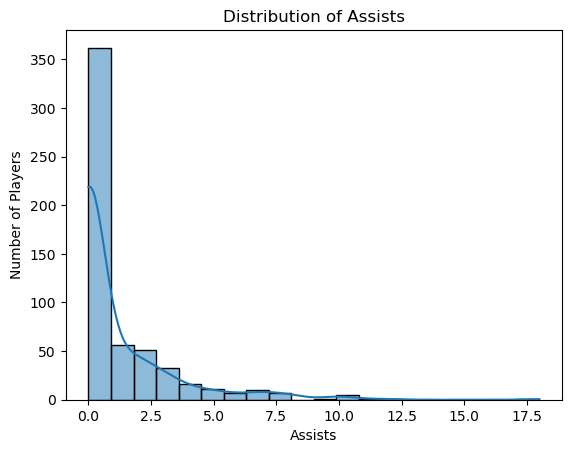

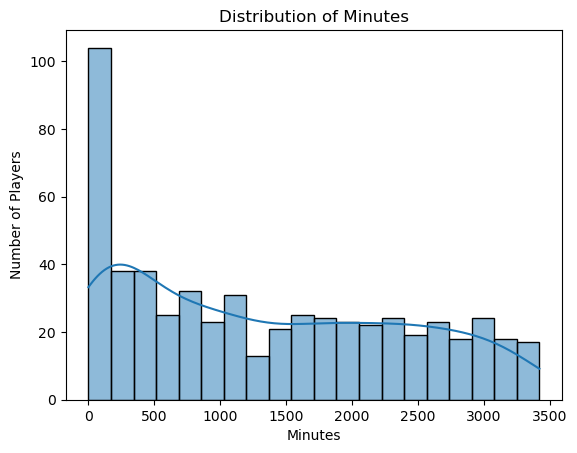

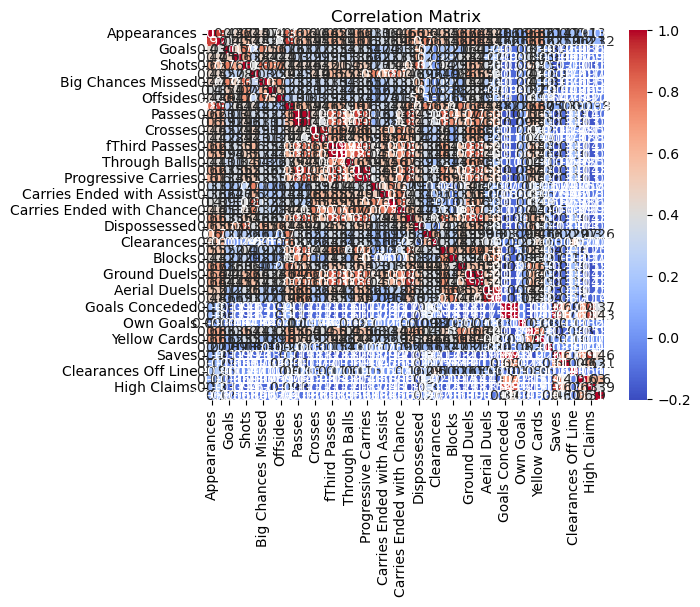

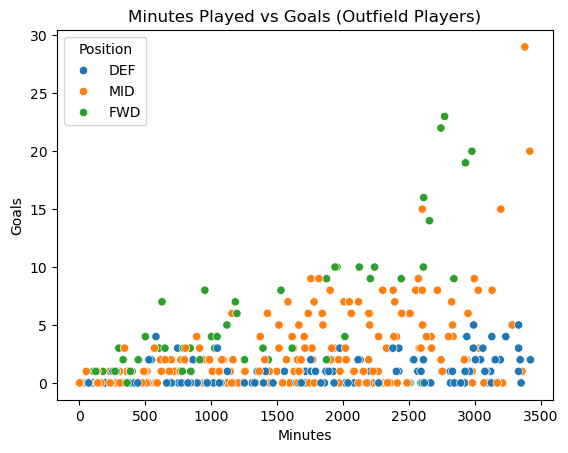

In [23]:
# 1. Distribution of Positions
if 'Position' in df.columns:
    sns.countplot(y='Position', data=df, order=df['Position'].value_counts().index)
    plt.title("Player Count by Position")
    plt.show()

# 2. Goals per Position
if 'Goals' in df.columns and 'Position' in df.columns:
    sns.boxplot(data=df, x='Goals', y='Position')
    plt.title("Goals Distribution by Position")
    plt.show()

# 3. Histogram of Key Stats
numeric_cols = ['Goals', 'Assists', 'Minutes']
for col in numeric_cols:
    if col in df.columns:
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Number of Players")
        plt.show()

# 4. Boxplot of Yellow/Red Cards
card_cols = ['YellowCards', 'RedCards']
for col in card_cols:
    if col in df.columns:
        sns.boxplot(x=df[col])
        plt.title(f"Distribution of {col}")
        plt.show()

# 5. Correlation Matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 6. Scatter Plot: Minutes Played vs Goals (non-goalkeepers only)
if 'Minutes' in df.columns and 'Goals' in df.columns and 'Position' in df.columns:
    df_outfield = df[~df['Position'].str.contains("GK", na=False)]
    sns.scatterplot(data=df_outfield, x='Minutes', y='Goals', hue='Position')
    plt.title("Minutes Played vs Goals (Outfield Players)")
    plt.show()


## Regression Modeling

In [24]:

# Single-variable: Minutes -> Goals
X_single = df[['Minutes']]
y = df['Goals']
X_train, X_test, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=1)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear R²:", r2_score(y_test, y_pred_lr))

# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
print("Polynomial R²:", r2_score(y_test, y_pred_poly))

# Ridge Regression with GridSearch
ridge = Ridge()
params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid = GridSearchCV(ridge, params, cv=5)
grid.fit(X_train, y_train)
y_pred_ridge = grid.predict(X_test)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Linear R²: 0.13658264078076532
Polynomial R²: 0.1230276868566742
Ridge R²: 0.13658262829576462


## Multi-variable Regression

In [25]:

features = ['Minutes', 'Assists']
X_multi = df[features]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = lr_multi.predict(X_test_multi)

print("Multi-variable Linear Regression R²:", r2_score(y_test_multi, y_pred_multi))


Multi-variable Linear Regression R²: 0.3390199180877319


## Model Evaluation Summary

In [26]:

print("\nModel Comparison:")
models = ['Linear (1 feature)', 'Polynomial (1 feature)', 'Ridge (1 feature)', 'Linear (2 features)']
preds = [y_pred_lr, y_pred_poly, y_pred_ridge, y_pred_multi]
tests = [y_test, y_test, y_test, y_test_multi]

for model, y_pred, y_true in zip(models, preds, tests):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    print(f"{model}: R²={r2:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")



Model Comparison:
Linear (1 feature): R²=0.137, MAE=1.958, RMSE=3.900
Polynomial (1 feature): R²=0.123, MAE=1.973, RMSE=3.931
Ridge (1 feature): R²=0.137, MAE=1.958, RMSE=3.900
Linear (2 features): R²=0.339, MAE=1.518, RMSE=2.492



## Conclusion

This project provided insights into player performance in the English Premier League 24/25 season, with a particular focus on modeling goal outcomes based on player statistics.

Key takeaways:
- Playtime (`Minutes`) alone does not strongly predict goals.
- Adding `Assists` significantly improves prediction accuracy, indicating the importance of playmaking in goal-scoring potential.
- Multi-variable regression delivered the best results and can be expanded with more features for future modeling.

Future improvements:
- Include additional variables like shots taken, xG (expected goals), or team performance metrics.
- Consider classification models for predicting player types or clustering for performance profiling.


